Model for prediction disease using symptoms 


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
df_severity = pd.read_csv('Symptom-severity.csv')

In [3]:
df_severity.head(10)  # Display the first 10 rows of the dataset

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


In [4]:
df_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
df_severity.describe()

,weight
count,133.000000
mean,4.225564
std,1.323543
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [6]:
df_precaution = pd.read_csv('Symptom_precaution.csv')

In [7]:
df_precaution.head(5)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [8]:
df_precaution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [9]:
df_Description = pd.read_csv('Symptom_Description.csv')
df_Description.head(5)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [10]:
df_Description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [11]:
df_Dataset = pd.read_csv('dataset.csv')

In [12]:
df_Dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [14]:
df_severity.isnull().sum()


Symptom    0
weight     0
dtype: int64

In [15]:
df_Dataset.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [16]:
df_Description.isnull().sum()

Disease        0
Description    0
dtype: int64

In [17]:
df_precaution.isnull().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

In [18]:
symptoms_cols = df_Dataset.columns[1:-1]
symptoms_cols

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16'],
      dtype='object')

In [19]:
symptoms_cols = [col for col in df_Dataset.columns if col.startswith('Symptom')]
df_Dataset[symptoms_cols] = df_Dataset[symptoms_cols].fillna('None')

In [20]:
df_Dataset.isnull().sum()

Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

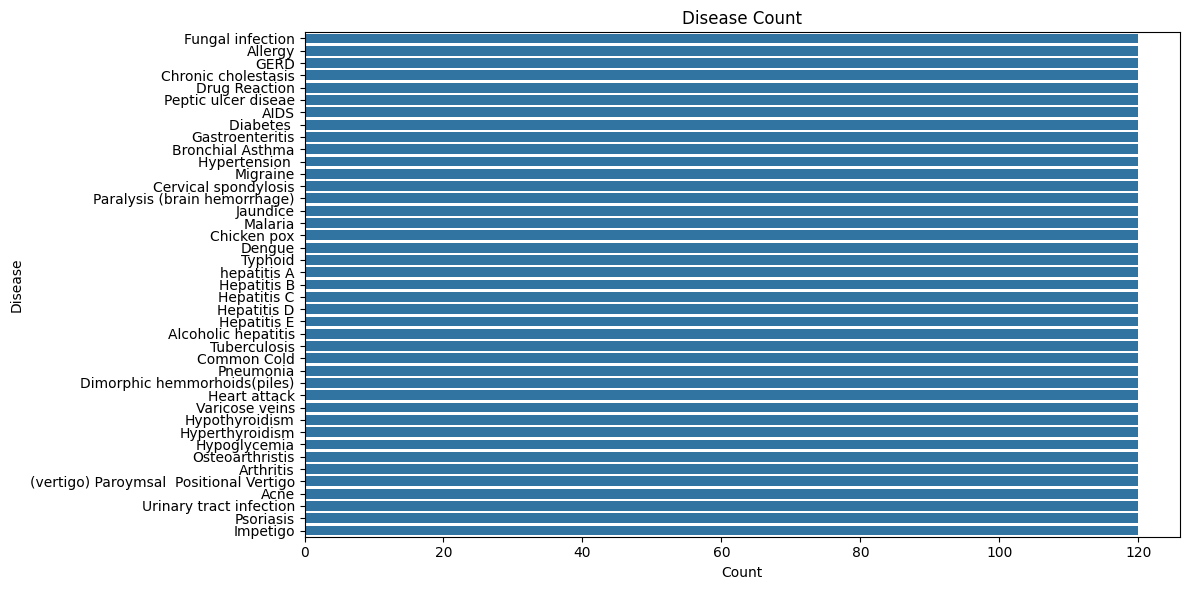

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y='Disease',
    data=df_Dataset,
    order=df_Dataset['Disease'].value_counts().index
)
plt.title('Disease Count')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

In [22]:
df_Dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [23]:
# how to save the cleaned dataset
df_Dataset.to_csv('cleaned_dataset.csv', index=False)

In [24]:
df = pd.read_csv('cleaned_dataset.csv')

In [25]:
df['all_symptoms'] = df.iloc[:,1:].values.tolist()

In [26]:
df = df[df['all_symptoms'].apply(lambda x: all(pd.notnull(x)))]

In [27]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(df['all_symptoms'])
y = df['Disease']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Common Cold       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [31]:
def predict_disease(symptoms):
    User_input_vector = mlb.transform([symptoms])
    prediction = model.predict(User_input_vector)
    return prediction[0]

In [32]:
print("Available diseases:")
print(sorted(mlb.classes_))

Available diseases:
[' chest_pain', ' chills', ' congestion', ' continuous_sneezing', ' cough', ' fatigue', ' headache', ' high_fever', ' loss_of_smell', ' malaise', ' muscle_pain', ' phlegm', ' redness_of_eyes', ' runny_nose', ' sinus_pressure', ' swelled_lymph_nodes', ' throat_irritation']


In [33]:
user_symptoms = ['Fever', 'Cough', 'Sore throat']
predicted_disease = predict_disease(user_symptoms)
print("Predicted Disease:", predicted_disease)

Predicted Disease: Common Cold


In [35]:
severity_df = pd.read_csv('Symptom-severity.csv')
description_df = pd.read_csv('Symptom_Description.csv')
precaution_df = pd.read_csv('Symptom_precaution.csv')

In [37]:
description_df.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [38]:
# Convert symptoms to lowercase for consistency
severity_dict = dict(zip(severity_df['Symptom'].str.lower(), severity_df['weight']))
description_dict = dict(zip(description_df['Disease'].str.lower(), description_df['Description']))
precaution_dict = precaution_df.set_index('Disease').T.to_dict('list')


In [39]:
def generate_report(user_symptoms):
    # Predict the disease
    prediction = predict_disease(user_symptoms)
    
    print(f"\n🩺 Predicted Disease: {prediction}\n")

    print("Matched Symptoms and Details:")
    for symptom in user_symptoms:
        s = symptom.lower()
        desc = description_dict.get(s, "No description available.")
        sev = severity_dict.get(s, "N/A")
        print(f"- {symptom} (Severity: {sev}): {desc}")
    
    precautions = precaution_dict.get(prediction, [])
    print("\nRecommended Precautions:")
    if precautions:
        for i, p in enumerate(precautions, 1):
            print(f"{i}. {p}")
    else:
        print("No specific precautions found.")


In [40]:
user_input = ["fatigue", "weight_loss", "increased_thirst"]
generate_report(user_input)



🩺 Predicted Disease: Common Cold

Matched Symptoms and Details:
- fatigue (Severity: 4): No description available.
- weight_loss (Severity: 3): No description available.
- increased_thirst (Severity: N/A): No description available.

Recommended Precautions:
1. drink vitamin c rich drinks
2. take vapour
3. avoid cold food
4. keep fever in check
